In [73]:
from Enviroment.Settings import *
from Enviroment.Manager import Enviroment

import numpy as np

In [74]:
def run_test(env, model, num_sim=10):
    ## Retorna a PB para o modelo treinado
    print("Testing the model...")

    np.random.seed(42)
    seeds = np.random.randint(0, 100_000, num_sim, dtype=int)
    pbs = np.zeros(num_sim)
    reward = np.zeros(num_sim)

    for i, seed in enumerate(seeds):

        print(f"Executando simulação {i+1} de {num_sim}")

        # Reseta o ambiente
        state, info = env.reset(int(seed))

        for reqs in range(MAX_REQS+1):

            if int == type(model):
                alg_heuristic = model
            else:
                alg_heuristic = model.predict(observation=state, deterministic=True)[0]

            state, _, done, trunk, info = env.step(alg_heuristic)

            if (done or trunk) and reward[i] == 0:
                reward[i] = env._reward_episode

        pbs[i] = info['total_number_of_blocks'] / reqs

        print(f"Blocking Probability: {pbs[i]} | Reward: {reward[i]} | Req: {reqs}")

    print(f"\nBlocking Probability: {np.mean(pbs)} | Min: {np.min(pbs)} | Max: {np.max(pbs)} | +- {np.std(pbs)}")
    print(f"Reward: {np.mean(reward)} | Min: {np.min(reward)} | Max: {np.max(reward)} | +- {np.std(reward)}")

    return pbs, reward


def run_test_GA(env, chromossome, num_sim=10):
    ## Retorna a PB para o modelo treinado
    print("Testing the model...")

    np.random.seed(42)
    seeds = np.random.randint(0, 100_000, num_sim, dtype=int)
    pbs = np.zeros(num_sim)
    reward = np.zeros(num_sim)

    for i, seed in enumerate(seeds):

        print(f"Executando simulação {i+1} de {num_sim}")

        # Reseta o ambiente
        state, info = env.reset(int(seed))

        for reqs in range(MAX_REQS+1):

            alg_heuristic = chromossome[state[1] + state[0] * 14]

            state, _, done, trunk, info = env.step(alg_heuristic)

            if (done or trunk) and reward[i] == 0:
                reward[i] = env._reward_episode

        pbs[i] = info['total_number_of_blocks'] / reqs

        print(f"Blocking Probability: {pbs[i]} | Reward: {reward[i]} | Req: {reqs}")

    print(f"\nBlocking Probability: {np.mean(pbs)} | Min: {np.min(pbs)} | Max: {np.max(pbs)} | +- {np.std(pbs)}")
    print(f"Reward: {np.mean(reward)} | Min: {np.min(reward)} | Max: {np.max(reward)} | +- {np.std(reward)}")

    return pbs, reward

## Resultados para RSA

In [75]:
# Avaliando a PB do modelo treinado
enviroment_type_test = {
    "Observation": "availability-vector",
    "Action": "RSA-SAR",
    "Reward": "RL-defaut",
    "StopCond": "MaxReq",
    "StartCond": "Empty"
}

In [8]:
# Cria o ambiente de simulação
env = Enviroment(
    network_load=130,
    k_routes=K_ROUTES,
    number_of_slots=NUMBER_OF_SLOTS,
    enviroment_type=enviroment_type_test,
    data_folder="RSA_teste",
)

run_test(env, 0, num_sim=10) # Executa o RSA 10 vezes para calcular a PB

print("Done!")

Testing the model...
Executando simulação 1 de 10
Blocking Probability: 0.02221 | Reward: 95558.0 | Req: 100000
Executando simulação 2 de 10
Blocking Probability: 0.02354 | Reward: 95292.0 | Req: 100000
Executando simulação 3 de 10
Blocking Probability: 0.02302 | Reward: 95396.0 | Req: 100000
Executando simulação 4 de 10
Blocking Probability: 0.02173 | Reward: 95654.0 | Req: 100000
Executando simulação 5 de 10
Blocking Probability: 0.02317 | Reward: 95366.0 | Req: 100000
Executando simulação 6 de 10
Blocking Probability: 0.02463 | Reward: 95074.0 | Req: 100000
Executando simulação 7 de 10
Blocking Probability: 0.02358 | Reward: 95284.0 | Req: 100000
Executando simulação 8 de 10
Blocking Probability: 0.02396 | Reward: 95208.0 | Req: 100000
Executando simulação 9 de 10
Blocking Probability: 0.02339 | Reward: 95322.0 | Req: 100000
Executando simulação 10 de 10
Blocking Probability: 0.02399 | Reward: 95202.0 | Req: 100000

Blocking Probability: 0.023322000000000002 | Min: 0.02173 | Max: 0.

## Resultados para SAR

In [9]:
# Cria o ambiente de simulação
env = Enviroment(
    network_load=130,
    k_routes=K_ROUTES,
    number_of_slots=NUMBER_OF_SLOTS,
    enviroment_type=enviroment_type_test,
    data_folder="SAR_eval",
)

run_test(env, 1, num_sim=10) # Executa o RSA 10 vezes para calcular a PB

print("Done!")

Testing the model...
Executando simulação 1 de 10
Blocking Probability: 0.02306 | Reward: 95388.0 | Req: 100000
Executando simulação 2 de 10
Blocking Probability: 0.02381 | Reward: 95238.0 | Req: 100000
Executando simulação 3 de 10
Blocking Probability: 0.0241 | Reward: 95180.0 | Req: 100000
Executando simulação 4 de 10
Blocking Probability: 0.02223 | Reward: 95554.0 | Req: 100000
Executando simulação 5 de 10
Blocking Probability: 0.02347 | Reward: 95306.0 | Req: 100000
Executando simulação 6 de 10
Blocking Probability: 0.02406 | Reward: 95188.0 | Req: 100000
Executando simulação 7 de 10
Blocking Probability: 0.02434 | Reward: 95132.0 | Req: 100000
Executando simulação 8 de 10
Blocking Probability: 0.02375 | Reward: 95250.0 | Req: 100000
Executando simulação 9 de 10
Blocking Probability: 0.0237 | Reward: 95260.0 | Req: 100000
Executando simulação 10 de 10
Blocking Probability: 0.02453 | Reward: 95094.0 | Req: 100000

Blocking Probability: 0.023705 | Min: 0.02223 | Max: 0.02453 | +- 0.0

In [10]:
run_test(env, 1, num_sim=3)

Testing the model...
Executando simulação 1 de 3
Blocking Probability: 0.02306 | Reward: 95388.0 | Req: 100000
Executando simulação 2 de 3
Blocking Probability: 0.02381 | Reward: 95238.0 | Req: 100000
Executando simulação 3 de 3
Blocking Probability: 0.0241 | Reward: 95180.0 | Req: 100000

Blocking Probability: 0.02365666666666667 | Min: 0.02306 | Max: 0.0241 | +- 0.00043820340279626094
Reward: 95268.66666666667 | Min: 95180.0 | Max: 95388.0 | +- 87.6406805592522


(array([0.02306, 0.02381, 0.0241 ]), array([95388., 95238., 95180.]))

In [23]:
LOADS = np.linspace(200, 70, 27)

PBS_RSA = np.zeros(len(LOADS))
PBS_SAR = np.zeros(len(LOADS))

for i, load in enumerate(LOADS):
    print(f"Load: {load}")
    env = Enviroment(
        network_load=load,
        k_routes=K_ROUTES,
        number_of_slots=NUMBER_OF_SLOTS,
        enviroment_type=enviroment_type_test,
        data_folder="LOAD_teste",
    )
    pb, _ = run_test(env, 0, num_sim=5)
    PBS_RSA[i] = np.mean(pb)

    pb, _ = run_test(env, 1, num_sim=5)
    PBS_SAR[i] = np.mean(pb)

    if np.mean(PBS_RSA[i]) == 0 or np.mean(PBS_SAR[i]) == 0:
        break

Load: 200.0
Testing the model...
Executando simulação 1 de 5
Blocking Probability: 0.11534 | Reward: 76932.0 | Req: 100000
Executando simulação 2 de 5
Blocking Probability: 0.1171 | Reward: 76580.0 | Req: 100000
Executando simulação 3 de 5
Blocking Probability: 0.11747 | Reward: 76506.0 | Req: 100000
Executando simulação 4 de 5
Blocking Probability: 0.11652 | Reward: 76696.0 | Req: 100000
Executando simulação 5 de 5
Blocking Probability: 0.11778 | Reward: 76444.0 | Req: 100000

Blocking Probability: 0.116842 | Min: 0.11534 | Max: 0.11778 | +- 0.0008602883237612845
Reward: 76631.6 | Min: 76444.0 | Max: 76932.0 | +- 172.0576647522568
Testing the model...
Executando simulação 1 de 5
Blocking Probability: 0.1206 | Reward: 75880.0 | Req: 100000
Executando simulação 2 de 5
Blocking Probability: 0.12402 | Reward: 75196.0 | Req: 100000
Executando simulação 3 de 5
Blocking Probability: 0.12455 | Reward: 75090.0 | Req: 100000
Executando simulação 4 de 5
Blocking Probability: 0.12197 | Reward: 75

In [37]:
PBS_RSA, PBS_SAR

(array([1.16842e-01, 1.09316e-01, 1.02862e-01, 9.61580e-02, 8.90360e-02,
        8.19300e-02, 7.55520e-02, 6.81220e-02, 6.08540e-02, 5.40740e-02,
        4.73700e-02, 4.10340e-02, 3.45200e-02, 2.85120e-02, 2.27340e-02,
        1.80900e-02, 1.36140e-02, 1.00220e-02, 7.05400e-03, 4.65000e-03,
        3.07200e-03, 1.81600e-03, 1.12600e-03, 6.22000e-04, 3.24000e-04,
        1.64000e-04, 7.60000e-05]),
 array([1.22802e-01, 1.15802e-01, 1.08442e-01, 1.01936e-01, 9.41220e-02,
        8.67700e-02, 7.96000e-02, 7.24000e-02, 6.54080e-02, 5.79020e-02,
        4.99220e-02, 4.27780e-02, 3.62000e-02, 2.95280e-02, 2.33340e-02,
        1.75980e-02, 1.28820e-02, 8.90000e-03, 5.70800e-03, 3.39600e-03,
        1.77600e-03, 8.64000e-04, 3.56000e-04, 1.00000e-04, 4.60000e-05,
        6.00000e-06, 2.00000e-06]))

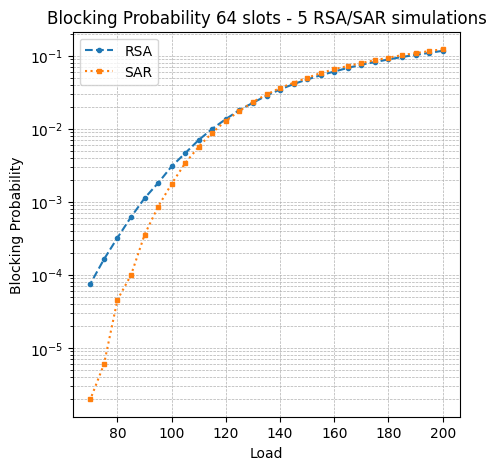

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

ax.semilogy(LOADS, PBS_RSA, label="RSA", linestyle='--', marker='o', markersize=3)
ax.semilogy(LOADS, PBS_SAR, label="SAR", linestyle=':', marker='s', markersize=3)

ax.set_xlabel("Load")
ax.set_ylabel("Blocking Probability")
ax.set_title("Blocking Probability 64 slots - 5 RSA/SAR simulations")

ax.grid(axis='both', which='both', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()


In [11]:
LOADS = np.linspace(320, 200, 25)

PBS_RSA = np.zeros(len(LOADS))
PBS_SAR = np.zeros(len(LOADS))

for i, load in enumerate(LOADS):
    print(f"Load: {load}")
    env = Enviroment(
        network_load=load,
        k_routes=K_ROUTES,
        number_of_slots=128,
        enviroment_type=enviroment_type_test,
        data_folder="LOAD_teste",
    )
    pb, _ = run_test(env, 0, num_sim=5)
    PBS_RSA[i] = np.mean(pb)

    pb, _ = run_test(env, 1, num_sim=5)
    PBS_SAR[i] = np.mean(pb)

    if np.mean(PBS_RSA[i]) == 0 or np.mean(PBS_SAR[i]) == 0:
        break

Load: 320.0
Testing the model...
Executando simulação 1 de 5
Blocking Probability: 0.02346 | Reward: 95308.0 | Req: 100000
Executando simulação 2 de 5
Blocking Probability: 0.02488 | Reward: 95024.0 | Req: 100000
Executando simulação 3 de 5
Blocking Probability: 0.02525 | Reward: 94950.0 | Req: 100000
Executando simulação 4 de 5
Blocking Probability: 0.02397 | Reward: 95206.0 | Req: 100000
Executando simulação 5 de 5
Blocking Probability: 0.02454 | Reward: 95092.0 | Req: 100000

Blocking Probability: 0.024420000000000004 | Min: 0.02346 | Max: 0.02525 | +- 0.0006385922016435837
Reward: 95116.0 | Min: 94950.0 | Max: 95308.0 | +- 127.71844032871682
Testing the model...
Executando simulação 1 de 5
Blocking Probability: 0.0216 | Reward: 95680.0 | Req: 100000
Executando simulação 2 de 5
Blocking Probability: 0.02277 | Reward: 95446.0 | Req: 100000
Executando simulação 3 de 5
Blocking Probability: 0.023 | Reward: 95400.0 | Req: 100000
Executando simulação 4 de 5
Blocking Probability: 0.02014 

In [12]:
PBS_RSA, PBS_SAR

(array([0.02442 , 0.021858, 0.019018, 0.016688, 0.014534, 0.012268,
        0.010542, 0.008934, 0.007242, 0.005932, 0.004726, 0.00372 ,
        0.002934, 0.00224 , 0.001698, 0.001258, 0.000998, 0.000694,
        0.00048 , 0.000364, 0.000262, 0.000196, 0.000138, 0.      ,
        0.      ]),
 array([2.1934e-02, 1.8840e-02, 1.6284e-02, 1.3870e-02, 1.1456e-02,
        9.3740e-03, 7.6260e-03, 5.8540e-03, 4.6020e-03, 3.2680e-03,
        2.3880e-03, 1.6080e-03, 1.1380e-03, 7.9800e-04, 4.3400e-04,
        2.9600e-04, 1.6600e-04, 6.2000e-05, 2.0000e-05, 3.4000e-05,
        1.2000e-05, 4.0000e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00]))

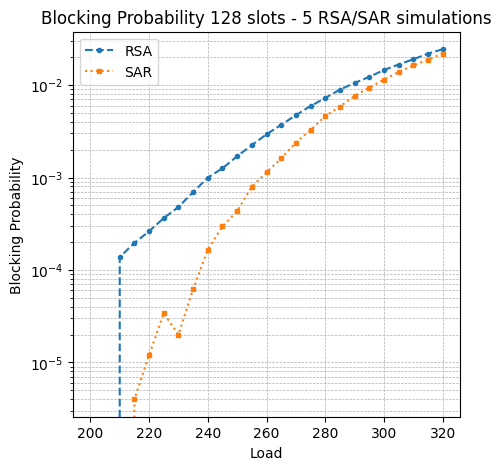

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

ax.semilogy(LOADS, PBS_RSA, label="RSA", linestyle='--', marker='o', markersize=3)
ax.semilogy(LOADS, PBS_SAR, label="SAR", linestyle=':', marker='s', markersize=3)

ax.set_xlabel("Load")
ax.set_ylabel("Blocking Probability")
ax.set_title("Blocking Probability 128 slots - 5 RSA/SAR simulations")

ax.grid(axis='both', which='both', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()


## Executando o GA

In [76]:
# chromossome = np.array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
#  0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,        
#  1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,        
#  1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,        
#  1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,        
#  1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,        
#  1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,        
#  0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,        
#  1, 1, 0, 1,])

chromossome = np.array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,])

enviroment_type_GA = {
    "Observation": "OD",
    "Action": "RSA-SAR",
    "Reward": "RL-defaut",
    "StopCond": "MaxReq",
    "StartCond": "Empty"
}

In [77]:
PBS_GA = np.zeros(len(LOADS))

for i, load in enumerate(np.linspace(300, 240, 7)):
    print(f"Load: {load}")
    env = Enviroment(
        network_load=load,
        k_routes=K_ROUTES,
        number_of_slots=128,
        enviroment_type=enviroment_type_GA,
        data_folder="GA_eval",
    )
    pb, _ = run_test_GA(env, chromossome, num_sim=5)
    PBS_GA[i] = np.mean(pb)

    if np.mean(PBS_GA[i]) == 0:
        break

Load: 300.0
Testing the model...
Executando simulação 1 de 5
Blocking Probability: 0.009 | Reward: 98200.0 | Req: 100000
Executando simulação 2 de 5
Blocking Probability: 0.00984 | Reward: 98032.0 | Req: 100000
Executando simulação 3 de 5
Blocking Probability: 0.00955 | Reward: 98090.0 | Req: 100000
Executando simulação 4 de 5
Blocking Probability: 0.00894 | Reward: 98212.0 | Req: 100000
Executando simulação 5 de 5
Blocking Probability: 0.00973 | Reward: 98054.0 | Req: 100000

Blocking Probability: 0.009412 | Min: 0.00894 | Max: 0.00984 | +- 0.0003730629973610357
Reward: 98117.6 | Min: 98032.0 | Max: 98212.0 | +- 74.61259947220711
Load: 290.0
Testing the model...
Executando simulação 1 de 5
Blocking Probability: 0.00574 | Reward: 98852.0 | Req: 100000
Executando simulação 2 de 5
Blocking Probability: 0.00634 | Reward: 98732.0 | Req: 100000
Executando simulação 3 de 5
Blocking Probability: 0.00642 | Reward: 98716.0 | Req: 100000
Executando simulação 4 de 5
Blocking Probability: 0.00582 

In [71]:
PBS_GA = np.zeros(len(LOADS))

for i, load in enumerate(np.linspace(300, 240, 7)):
    print(f"Load: {load}")
    env = Enviroment(
        network_load=load,
        k_routes=K_ROUTES,
        number_of_slots=128,
        enviroment_type=enviroment_type_GA,
        data_folder="GA_eval",
    )
    pb, _ = run_test_GA(env, chromossome, num_sim=5)
    PBS_GA[i] = np.mean(pb)

    if np.mean(PBS_GA[i]) == 0:
        break

Load: 260
Testing the model...
Executando simulação 1 de 5
Blocking Probability: 0.00088 | Reward: 99824.0 | Req: 100000
Executando simulação 2 de 5
Blocking Probability: 0.00094 | Reward: 99812.0 | Req: 100000
Executando simulação 3 de 5
Blocking Probability: 0.00094 | Reward: 99812.0 | Req: 100000
Executando simulação 4 de 5
Blocking Probability: 0.00081 | Reward: 99838.0 | Req: 100000
Executando simulação 5 de 5
Blocking Probability: 0.001 | Reward: 99800.0 | Req: 100000

Blocking Probability: 0.0009139999999999999 | Min: 0.00081 | Max: 0.001 | +- 6.437390775772434e-05
Reward: 99817.2 | Min: 99800.0 | Max: 99838.0 | +- 12.874781551544865


In [41]:
from stable_baselines3 import PPO

# Cria o ambiente de simulação
env = Enviroment(
    network_load=LOAD,
    k_routes=K_ROUTES,
    number_of_slots=NUMBER_OF_SLOTS,
    enviroment_type=enviroment_type_test,
    data_folder="PPO_Eval",
)

LOG_PATH = '../logs/PPO_002_good'

model = PPO.load(LOG_PATH + '\\training\\best_model\\best_model.zip')

## Retorna a PB para o modelo treinado


In [42]:
LOADS = np.linspace(320, 280, 9)
PBS_MODEL = np.zeros(len(LOADS))

for i, load in enumerate(LOADS):
    print(f"Load: {load}")
    env = Enviroment(
        network_load=load,
        k_routes=K_ROUTES,
        number_of_slots=128,
        enviroment_type=enviroment_type_test,
        data_folder="GA_eval",
    )
    pb, _ = run_test(env, model, num_sim=5)
    PBS_MODEL[i] = np.mean(pb)

    if np.mean(PBS_MODEL[i]) == 0:
        break

Load: 320.0
Testing the model...
Executando simulação 1 de 5
Blocking Probability: 0.0216 | Reward: 95680.0 | Req: 100000
Executando simulação 2 de 5
Blocking Probability: 0.02277 | Reward: 95446.0 | Req: 100000
Executando simulação 3 de 5
Blocking Probability: 0.023 | Reward: 95400.0 | Req: 100000
Executando simulação 4 de 5
Blocking Probability: 0.02014 | Reward: 95972.0 | Req: 100000
Executando simulação 5 de 5
Blocking Probability: 0.02216 | Reward: 95568.0 | Req: 100000

Blocking Probability: 0.021934000000000002 | Min: 0.02014 | Max: 0.023 | +- 0.0010214029567217817
Reward: 95613.2 | Min: 95400.0 | Max: 95972.0 | +- 204.28059134435654
Load: 315.0
Testing the model...
Executando simulação 1 de 5
Blocking Probability: 0.01828 | Reward: 96344.0 | Req: 100000
Executando simulação 2 de 5
Blocking Probability: 0.01889 | Reward: 96222.0 | Req: 100000
Executando simulação 3 de 5
Blocking Probability: 0.01952 | Reward: 96096.0 | Req: 100000
Executando simulação 4 de 5
Blocking Probability

In [44]:
PBS_MODEL

array([0.021934, 0.01884 , 0.016284, 0.01387 , 0.011456, 0.009374,
       0.007626, 0.005854, 0.004602])

In [45]:
PBS_SAR[:len(PBS_GA)]

array([0.021934, 0.01884 , 0.016284, 0.01387 , 0.011456, 0.009374,
       0.007626, 0.005854, 0.004602])

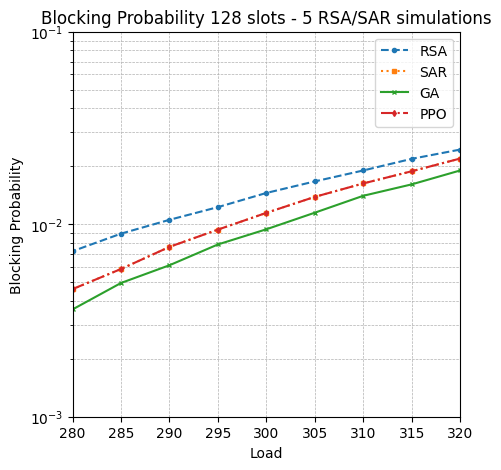

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

ax.semilogy(LOADS, PBS_RSA[:len(PBS_GA)], label="RSA", linestyle='--', marker='o', markersize=3)
ax.semilogy(LOADS, PBS_SAR[:len(PBS_GA)], label="SAR", linestyle=':', marker='s', markersize=3)
ax.semilogy(LOADS, PBS_GA, label="GA", linestyle='-', marker='x', markersize=3)
ax.semilogy(LOADS, PBS_MODEL, label="PPO", linestyle='-.', marker='d', markersize=3)

ax.set_xlabel("Load")
ax.set_ylabel("Blocking Probability")
ax.set_title("Blocking Probability 128 slots - 5 RSA/SAR simulations")

# Corta o gráfico na carga de 280
ax.set_xlim(280, 320)
ax.set_ylim(1e-3, 1e-1)

ax.grid(axis='both', which='both', linestyle='--', linewidth=0.5)
ax.legend()
plt.show()


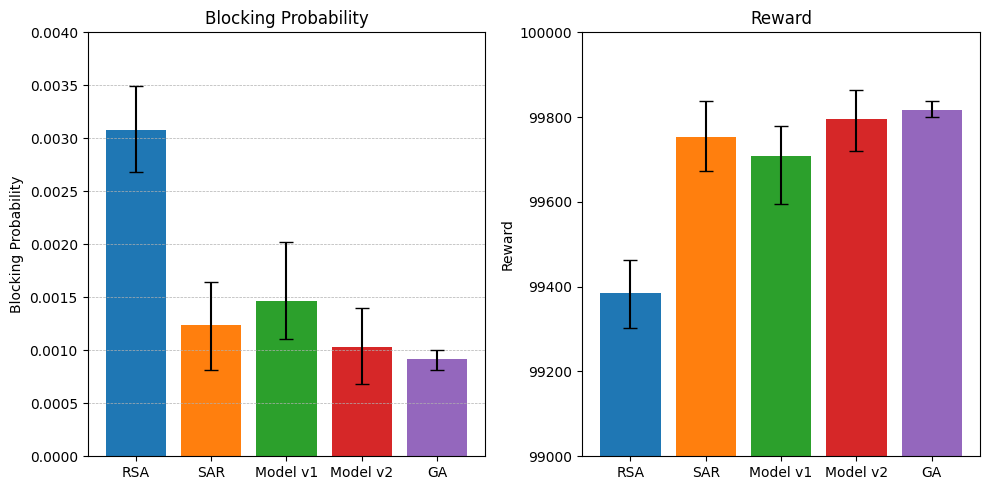

Carga de 260 ERlangs


In [72]:
RSA_PB_MEAN = 0.0030750000000000005
RSA_PB_MIN = 0.00268
RSA_PB_MAX = 0.00349

RSA_REWARD_MEAN = 99385.0
RSA_REWARD_MIN = 99302.0
RSA_REWARD_MAX = 99464.0

SAR_PB_MEAN = 0.001239
SAR_PB_MIN = 0.00081
SAR_PB_MAX = 0.00164

SAR_REWARD_MEAN = 99752.2
SAR_REWARD_MIN = 99672.0
SAR_REWARD_MAX = 99838.0

MODEL1_PB_MEAN = 0.001461
MODEL1_PB_MIN = 0.00111
MODEL1_PB_MAX = 0.00202

MODEL1_REWARD_MEAN = 99707.8
MODEL1_REWARD_MIN = 99596.0
MODEL1_REWARD_MAX = 99778.0

MODEL2_PB_MEAN = 0.001027
MODEL2_PB_MIN = 0.00068
MODEL2_PB_MAX = 0.0014

MODEL2_REWARD_MEAN = 99794.6
MODEL2_REWARD_MIN = 99720.0
MODEL2_REWARD_MAX = 99864.0

GA_PB_MEAN = 0.0009139999999999999
GA_PB_MIN = 0.00081
GA_PB_MAX = 0.001

GA_REWARD_MEAN = 99817.2
GA_REWARD_MIN = 99800.0
GA_REWARD_MAX = 99838.0

# Cria um gráfico de barra com os valores médios e desvio padrão para a PB e outro para a recompensa
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].bar(["RSA", "SAR", "Model v1", "Model v2", "GA"], [RSA_PB_MEAN, SAR_PB_MEAN, MODEL1_PB_MEAN, MODEL2_PB_MEAN, GA_PB_MEAN], yerr=[[RSA_PB_MEAN - RSA_PB_MIN, SAR_PB_MEAN - SAR_PB_MIN, MODEL1_PB_MEAN - MODEL1_PB_MIN, MODEL2_PB_MEAN - MODEL2_PB_MIN, GA_PB_MEAN - GA_PB_MIN], [RSA_PB_MAX - RSA_PB_MEAN, SAR_PB_MAX - SAR_PB_MEAN, MODEL1_PB_MAX - MODEL1_PB_MEAN, MODEL2_PB_MAX - MODEL2_PB_MEAN, GA_PB_MAX - GA_PB_MEAN]], capsize=5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax[0].set_title("Blocking Probability")
ax[0].set_ylabel("Blocking Probability")
ax[0].set_ylim(0, 0.004)
ax[0].grid(axis='y', linestyle='--', linewidth=0.5)

ax[1].bar(["RSA", "SAR", "Model v1", "Model v2", "GA"], [RSA_REWARD_MEAN, SAR_REWARD_MEAN, MODEL1_REWARD_MEAN, MODEL2_REWARD_MEAN, GA_REWARD_MEAN], yerr=[[RSA_REWARD_MEAN - RSA_REWARD_MIN, SAR_REWARD_MEAN - SAR_REWARD_MIN, MODEL1_REWARD_MEAN - MODEL1_REWARD_MIN, MODEL2_REWARD_MEAN - MODEL2_REWARD_MIN, GA_REWARD_MEAN - GA_REWARD_MIN], [RSA_REWARD_MAX - RSA_REWARD_MEAN, SAR_REWARD_MAX - SAR_REWARD_MEAN, MODEL1_REWARD_MAX - MODEL1_REWARD_MEAN, MODEL2_REWARD_MAX - MODEL2_REWARD_MEAN, GA_REWARD_MAX - GA_REWARD_MEAN]], capsize=5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax[1].set_title("Reward")
ax[1].set_ylabel("Reward")
ax[1].set_ylim(99000, 100_000)


plt.tight_layout()
plt.show()

print("Carga de 260 ERlangs")

# Carga 300

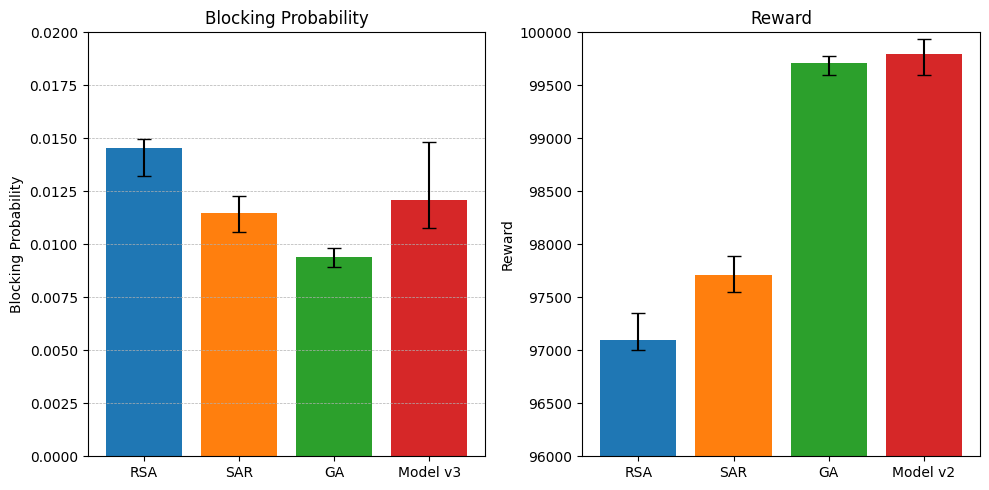

In [66]:
RSA_PB_MEAN = 0.014534
RSA_PB_MIN = 0.01324
RSA_PB_MAX = 0.01497

RSA_REWARD_MEAN = 97093.2
RSA_REWARD_MIN = 97006.0    
RSA_REWARD_MAX = 97352.0

SAR_PB_MEAN = 0.011456
SAR_PB_MIN = 0.01056
SAR_PB_MAX = 0.01227

SAR_REWARD_MEAN = 97708.8
SAR_REWARD_MIN = 97546.0
SAR_REWARD_MAX = 97888.0

GA_PB_MEAN = 0.009412
GA_PB_MIN = 0.00894
GA_PB_MAX = 0.00984

GA_REWARD_MEAN = 98117.6
GA_REWARD_MIN = 98032.0
GA_REWARD_MAX = 98212.0

MODEL3_PB_MEAN = 0.012086
MODEL3_PB_MIN = 0.01077
MODEL3_PB_MAX = 0.01353

MODEL3_REWARD_MEAN = 97582.8
MODEL3_REWARD_MIN = 97294.0
MODEL3_REWARD_MAX = 97846.0

# Cria um gráfico de barra com os valores médios e desvio padrão para a PB e outro para a recompensa
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].bar(["RSA", "SAR", "GA", "Model v3"], [RSA_PB_MEAN, SAR_PB_MEAN, GA_PB_MEAN, MODEL3_PB_MEAN], yerr=[[RSA_PB_MEAN - RSA_PB_MIN, SAR_PB_MEAN - SAR_PB_MIN, GA_PB_MEAN - GA_PB_MIN, MODEL3_PB_MEAN - MODEL3_PB_MIN], [RSA_PB_MAX - RSA_PB_MEAN, SAR_PB_MAX - SAR_PB_MEAN, GA_PB_MAX - GA_PB_MEAN, MODEL3_PB_MAX - MODEL3_PB_MIN]], capsize=5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax[0].set_title("Blocking Probability")
ax[0].set_ylabel("Blocking Probability")
ax[0].set_ylim(0, 0.02)
ax[0].grid(axis='y', linestyle='--', linewidth=0.5)

ax[1].bar(["RSA", "SAR", "GA", "Model v2"], [RSA_REWARD_MEAN, SAR_REWARD_MEAN, MODEL1_REWARD_MEAN, MODEL2_REWARD_MEAN], yerr=[[RSA_REWARD_MEAN - RSA_REWARD_MIN, SAR_REWARD_MEAN - SAR_REWARD_MIN, MODEL1_REWARD_MEAN - MODEL1_REWARD_MIN, MODEL2_REWARD_MEAN - MODEL1_REWARD_MIN], [RSA_REWARD_MAX - RSA_REWARD_MEAN, SAR_REWARD_MAX - SAR_REWARD_MEAN, MODEL1_REWARD_MAX - MODEL1_REWARD_MEAN, MODEL2_REWARD_MAX - MODEL2_REWARD_MIN]], capsize=5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax[1].set_title("Reward")
ax[1].set_ylabel("Reward")
ax[1].set_ylim(96000, 100_000)


plt.tight_layout()
plt.show()



In [67]:
Blocking Probability: 0.012086000000000001 | Min: 0.01077 | Max: 0.01353 | +- 0.000883789567713944
Reward: 97582.8 | Min: 97294.0 | Max: 97846.0 | +- 176.7579135427888 

SyntaxError: invalid syntax (2458813497.py, line 1)